In [1]:
import MyLibrary
import glob, os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
corpus_path="/Users/yumeng.zou/Documents/novels/*.txt"
austen_path="/Users/yumeng.zou/Documents/stylometric/Austen/*.txt"
alcott_path="/Users/yumeng.zou/Documents/stylometric/Alcott/*.txt"

In [3]:
filenames=glob.glob(corpus_path)
corpus=[MyLibrary.tokenize(open(f,'r').read()) for f in filenames]

In [4]:
## extract 100 features from the larger corpus using the top 100 frequent words
tf_dict=MyLibrary.text_freq(corpus_path)
top_n=sorted(tf_dict.items(), reverse=True, key=lambda x:x[1])[:100]
features,counts=zip(*top_n)

In [5]:
# extract samples by chunking Austen' & Alcott' texts
austen_alcott=glob.glob(austen_path) + glob.glob(alcott_path)
samples=[]
for f in austen_alcott:
    text=MyLibrary.tokenize(open(f,'r').read())
    text_chunks=MyLibrary.chunk(text,5000)
    samples.extend(text_chunks)

In [6]:
# count the frequency of features in samples -- vectorize samples
X=[]
for chunk in samples:
    vector=MyLibrary.vectorize(features, chunk)
    X.append(vector)

In [7]:
# clustering
cluster=KMeans(n_clusters=2).fit(X)

In [8]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

[ 0.42887582  0.17444654]


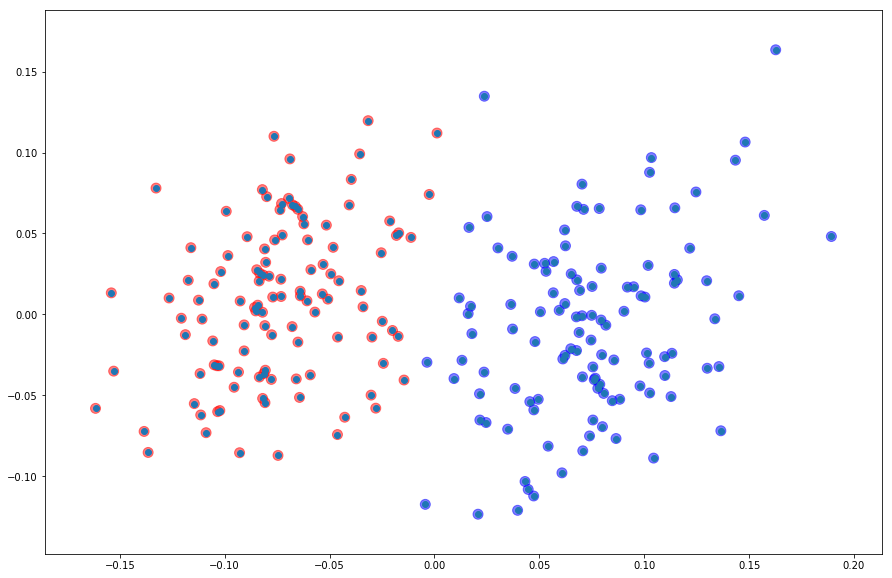

In [9]:
# Visualization using Principle Component Analysis
pca=PCA(n_components=2).fit(X)
print pca.explained_variance_ratio_

x,y=zip(*pca.transform(X))

colors=['r' if boo else 'b' for boo in cluster.labels_]

plt.figure(figsize=(15,10))
plt.scatter(x,y,s=100,alpha=0.5,c=colors)
plt.scatter(x,y)